## Шаг 1.  Подготовка данных к анализу!

In [1]:
import pandas as pd

data_games = pd.read_csv('/games.csv')

for i in data_games.columns:
    print('Количество пропусков в столбце', i, ' = ', data_games[i].isnull().sum())

data_games.head(5)

Количество пропусков в столбце Unnamed: 0  =  0
Количество пропусков в столбце Name  =  2
Количество пропусков в столбце Platform  =  0
Количество пропусков в столбце Year_of_Release  =  269
Количество пропусков в столбце Genre  =  2
Количество пропусков в столбце NA_players  =  0
Количество пропусков в столбце EU_players  =  0
Количество пропусков в столбце RU_players  =  0
Количество пропусков в столбце Other_players  =  0
Количество пропусков в столбце Critic_Score  =  8582
Количество пропусков в столбце User_Score  =  6704
Количество пропусков в столбце Rating  =  6769


,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
Unnamed: 0         16719 non-null int64
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


На основании полученных данных о пропущенных значениях я принимаю решение заменить пропуски следующим образом:
    1. Столбец Name - пропущенные значения заменить на Uknown. Данное значение не будет вносить серьезное искажение, но позволит работать со всеми столбцами как с типом String.
    2. Столбец Year-of-Release - получим для каждого жанра медиану его года выпуска и заполним пропущенное значение.
    3. Genre - удалим эти значения, чтобы не создавать лишние "хвосты" с "уникальными" значениями.
    4. Critic_Score, User_Score - заменим на -1, так как в данных присутствуют игры с нулевым скорингом в данных столбцах.
    5. Rating - заменяем значение на Unknown, так как при оценке частоты рейтинга выводы будут искажены.

In [3]:
data_games.columns = ['id', 'name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 'ru_sales', 'sales_un', 'critic_score', 'user_score', 'rating']

data_games['name'] = data_games['name'].fillna('Unknown')

data_games = data_games.dropna(subset=['genre'])


data_games['critic_score']= data_games['critic_score'].fillna(-1)
data_games.loc[data_games['critic_score'] < 0, 'critic_score'] = None
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors = 'coerce')
data_games['user_score']= data_games['user_score'].fillna(-1)
data_games.loc[data_games['user_score'] < 0, 'user_score'] = None


data_games['rating']= data_games['rating'].fillna('Unknown')

genre_gen = data_games.pivot_table(index = 'genre', 
                                   values = 'release_year', 
                                   aggfunc = 'median').reset_index()


data_games['release_year'] = data_games['release_year'].fillna(-1)

def full_year(sets):
    if sets['release_year'] == -1:
        gen = sets["genre"]
        return genre_gen.query('genre == @gen')['release_year']
    else:
        return sets['release_year']
    
data_games['release_year'] = data_games.apply(full_year, axis = 1)


#Приводим все столбцы к нужному типу данных.

data_games['release_year'] = pd.to_numeric(data_games['release_year'], errors = 'ignore').astype(int)
data_games['name'] = data_games['name'].str.lower()
data_games['platform'] = data_games['platform'].str.lower()
data_games['genre'] = data_games['genre'].str.lower()

data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['ru_sales'] + data_games['sales_un']




In [4]:
rating_data = pd.read_csv('/rating.csv')

rating_data

,Unnamed: 0,rating_type,decryption
0,0,E,Для всех
1,1,M,От 17 лет
2,2,T,Подросткам 13—19 лет
3,3,E10+,Для всех старше 10 лет
4,4,K-A,Для всех(до 1998 года)
5,5,AO,Только для взрослых
6,6,EC,Для детей младшего возраста
7,7,RP,Рейтинг ожидается


In [5]:
for i in data_games.columns:
    print('Количество пропусков в столбце', i, ' = ', data_games[i].isnull().sum())
    
print()

data_games.head()

Количество пропусков в столбце id  =  0
Количество пропусков в столбце name  =  0
Количество пропусков в столбце platform  =  0
Количество пропусков в столбце release_year  =  0
Количество пропусков в столбце genre  =  0
Количество пропусков в столбце na_sales  =  0
Количество пропусков в столбце eu_sales  =  0
Количество пропусков в столбце ru_sales  =  0
Количество пропусков в столбце sales_un  =  0
Количество пропусков в столбце critic_score  =  8580
Количество пропусков в столбце user_score  =  9127
Количество пропусков в столбце rating  =  0
Количество пропусков в столбце total_sales  =  0



,id,name,platform,release_year,genre,na_sales,eu_sales,ru_sales,sales_un,critic_score,user_score,rating,total_sales
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [6]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 13 columns):
id              16717 non-null int64
name            16717 non-null object
platform        16717 non-null object
release_year    16717 non-null int64
genre           16717 non-null object
na_sales        16717 non-null float64
eu_sales        16717 non-null float64
ru_sales        16717 non-null float64
sales_un        16717 non-null float64
critic_score    8137 non-null float64
user_score      7590 non-null float64
rating          16717 non-null object
total_sales     16717 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


In [7]:
sales_pivot = (
    data_games
    .pivot_table(index = ['genre'],
                 values = ['eu_sales', 'ru_sales', 'na_sales', 'sales_un'], 
                 aggfunc = 'sum')
)


sales_pivot



,eu_sales,na_sales,ru_sales,sales_un
genre,,,,
action,519.13,879.01,161.44,184.60
adventure,63.54,105.26,52.30,16.49
fighting,100.33,223.36,87.48,36.36
misc,212.74,407.27,108.11,74.39
platform,200.35,445.50,130.83,51.09
puzzle,50.01,122.87,57.31,12.38
racing,236.51,359.35,56.71,76.10
role-playing,188.71,330.81,355.46,59.63
shooter,317.34,592.24,38.76,104.11


## Вывод: 

    Данные подготовлены к анализу. Пропуски заполнены. Данные приведены к единому виду и типу, что облегчает дальнейший анализ.

# Шаг 2. Исследовательский анализ данных

## 1. Постройте распределение по годам релиза и опишите полученный результат.

In [8]:
from matplotlib import pyplot as plt


data_games.pivot_table(index = 'release_year', 
                       values = 'total_sales',
                       aggfunc = 'count').reset_index().plot(x = 'release_year', 
                                                             y = 'total_sales', 
                                                             title = 'Распределение по годам релиза')

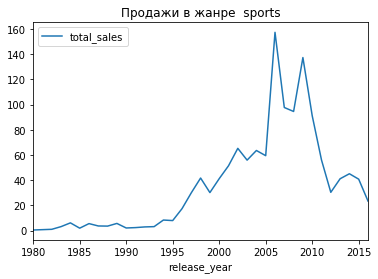

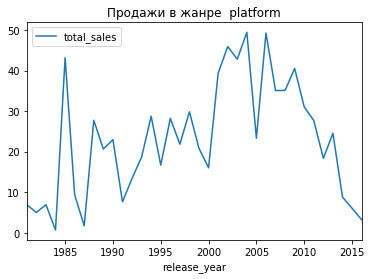

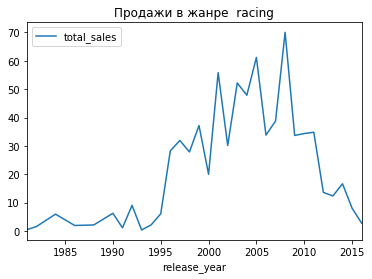

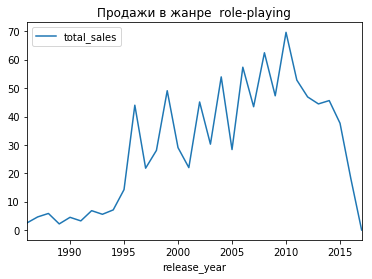

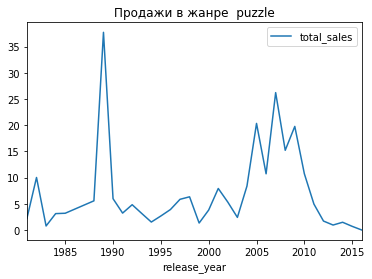

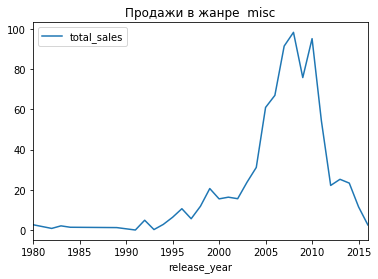

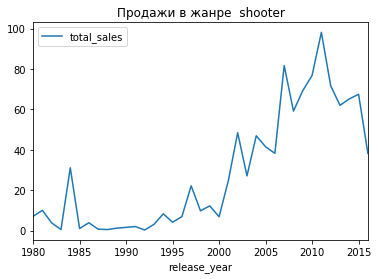

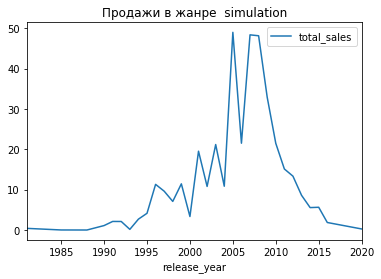

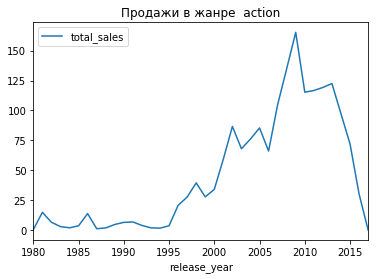

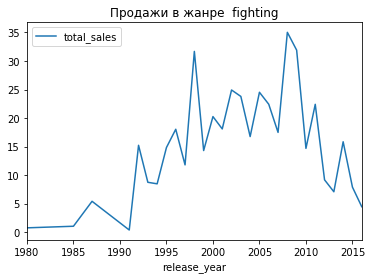

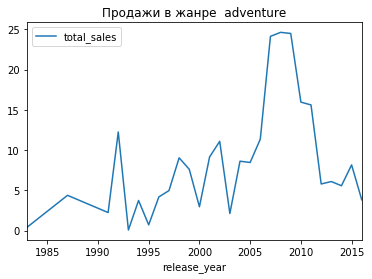

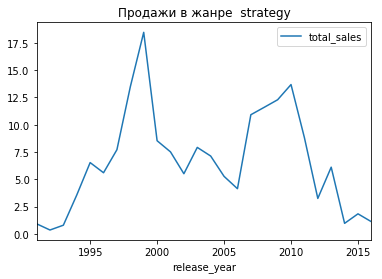

In [9]:
genres = data_games['genre'].unique()

for i in genres:
    genre_game = data_games.query('genre == @i')
    
    
    (
        genre_game
        .pivot_table(index = 'release_year',
                           values = 'total_sales',
                           aggfunc = 'sum').reset_index()
        .plot(title = 'Продажи в жанре  ' + i,
              x = 'release_year',
              y = 'total_sales')
    )

In [10]:
def get_year_group(year):
    if year < 1980:
        return 'до 1980'
    if year < 1985:
        return '1980-1985'        
    if year < 1990:
        return '1985-1990'
    if year < 1995:
        return '1990-1995'        
    if year < 2000:
        return '1995-2000'        
    if year < 2005:
        return '2000-2005'        
    if year < 2010:
        return '2005-2010'

data_games['year_group'] = data_games['release_year'].apply(get_year_group)

data_info = data_games.pivot_table(index = ['genre', 'year_group'], 
                       values = 'total_sales', 
                       aggfunc = ['sum', 'count'])

data_info.columns = ['total_income', 'games_published']

data_info.head(10)

#В данном пункте сделал разбивку по годам, так как в противном случае таблица получается чрезмерной.

total_income  games_published
genre     year_group                               
action    1980-1985          26.34               52
          1985-1990          24.76               14
          1990-1995          20.35               19
          1995-2000         118.91              143
          2000-2005         324.12              505
          2005-2010         556.60             1141
adventure 1980-1985           0.40                1
          1985-1990           4.38                1
          1990-1995          18.30               11
          1995-2000          26.51               86

На основании построенных графиков мы можем сделать следующие выводы для каждого жанра:
    1. Sports - пик популярности приходится на 2006, 2009 года с падением популярности в 2007-2008 г. По текущий момент наблюдается тенденция к падению популярности.
    2. Platform - пик популярности приходится на 1986, 2003-2005 года с падением популярности c 2005 г. По текущий момент наблюдается тенденция к падению популярности.
    3. Racing - пик популярности приходится на 2001, 2003-2009 года с падением популярности после 2009 г. По текущий момент наблюдается тенденция к падению популярности.
    4. Role-playing - пик популярности приходится с 1996 года с промежутками падения популярности через год. По текущий момент наблюдается тенденция к падению популярности.
    5. Puzzle - пик популярности приходится на 1998 год, 2005-2010 года. По текущий момент наблюдается тенденция к падению популярности.
    6. Misc - пик популярности приходится на 2002-2011 года. По текущий момент наблюдается тенденция к падению популярности.
    7. Shooter - пик популярности приходится на 2000-2011 года. По текущий момент наблюдается тенденция к падению популярности.
    8. Simulation - пик популярности приходится на 2000-2009 года. По текущий момент наблюдается тенденция к падению популярности.
    9. Action - пик популярности приходится на 1999-2010 года. По текущий момент наблюдается тенденция к падению популярности.
    10. Fighting - пик популярности приходится на 1992-2006. По текущий момент наблюдается тенденция к падению популярности.
    11. Adventure - пик популярности приходится на 2007-2009 гг. По текущий момент наблюдается тенденция к падению популярности.
    12. Strategy - пик популярности приходится на 1998-1999, 2006-2011 гг. По текущий момент наблюдается тенденция к падению популярности.
    
С 2000 года наблюдалось резкое повышение общего количества опубликованных игр, однако с 2009 года наблюдается тенденция к уменьшению общего числа.
    
Общая тенденция падения популярности в последние годы может объясняться уменьшением количества наблюдений. Наибольшая популярность сохраняется в жанрах Shooter и Sports.

## 2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод

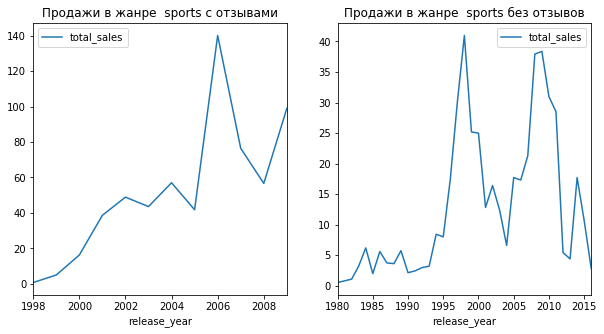

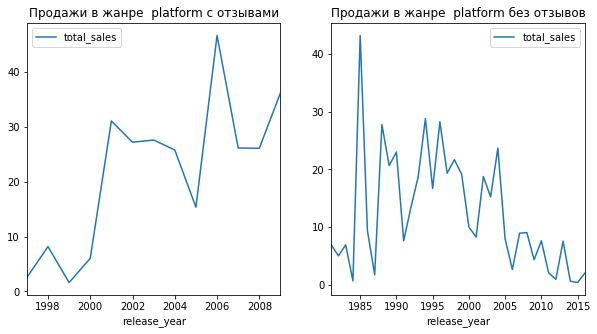

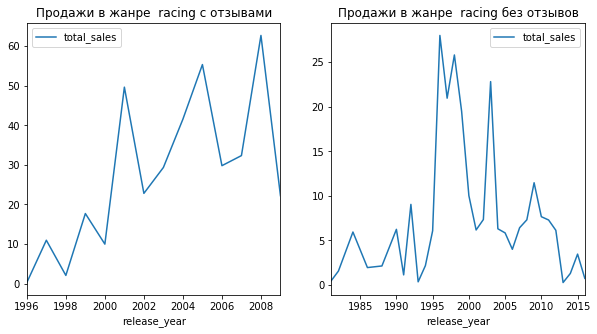

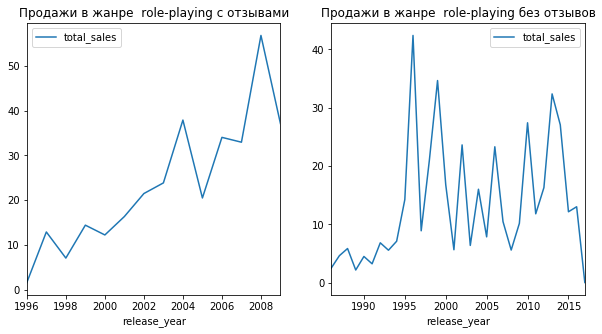

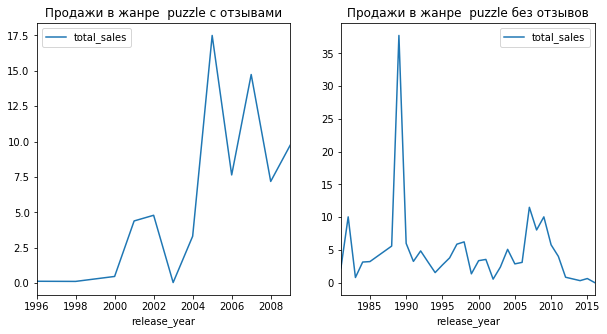

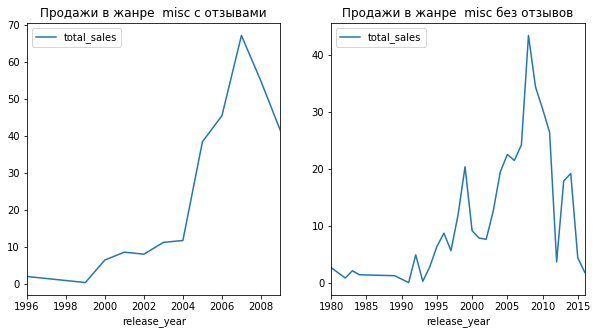

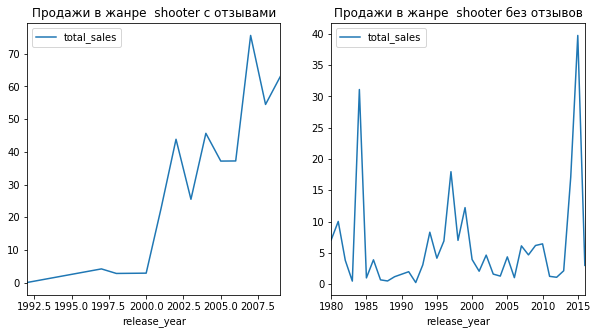

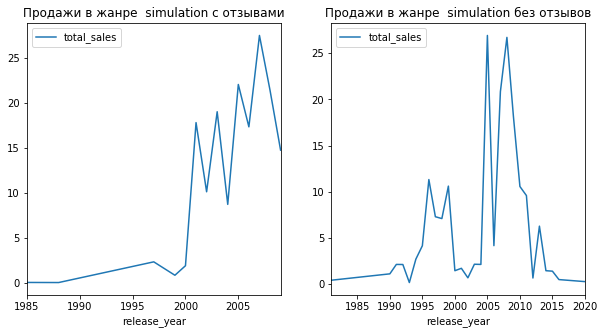

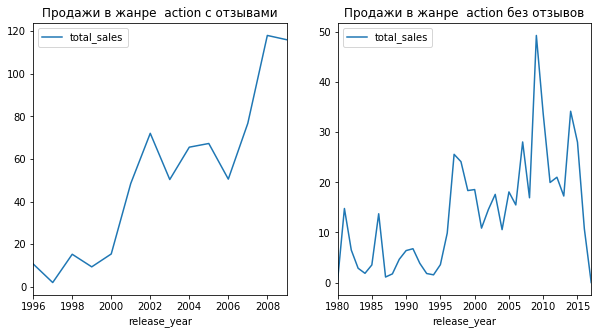

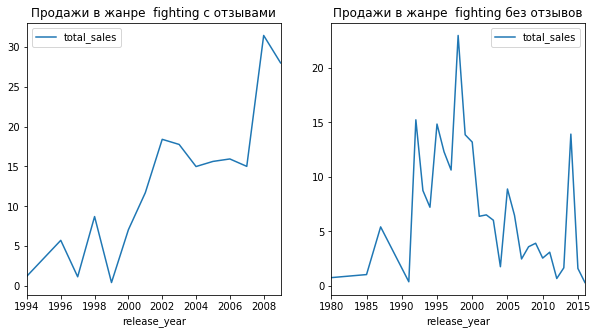

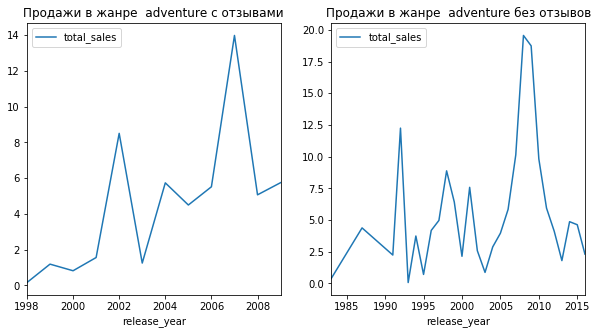

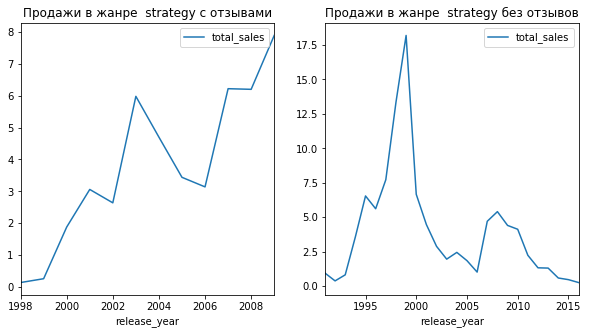

In [11]:
genres = data_games['genre'].unique()


for i in genres:
    plt.subplots(figsize = (10, 5))
    genre_game = data_games.dropna().query('genre == @i')
    plot = (
        genre_game.pivot_table(index = 'release_year', 
                                  values = 'total_sales', 
                                  aggfunc = 'sum').reset_index()
        .plot(title = 'Продажи в жанре  ' + i + ' c отзывами', 
              x = 'release_year', y = 'total_sales', 
              ax = plt.subplot(1, 2, 1))
    )
    
    genre_game = data_games.query('genre == @i')
    
    plot = (
        genre_game
        .query('critic_score.isnull() or user_score.isnull()', engine='python')
        .pivot_table(index = 'release_year', 
                     values = 'total_sales', 
                     aggfunc = 'sum').reset_index()
        .plot(title = 'Продажи в жанре  ' + i + ' без отзывов',
              x = 'release_year', 
              y = 'total_sales', 
              ax = plt.subplot(1, 2, 2))
    )
    
    
    

## Выводы:

При оценке общей прибыли от каждой игры наблюдается тендеция увеличения или уменьшения прибыли в зависимост от года выпуска игры. Тем не менее, во всех случаях наличие отзывов существенно повышает общую прибыль разработчиков в 1,5-2 раза в отличии от игр без отзывов.

## 3. Постройте график продаж по каждому году; сделайте вывод.

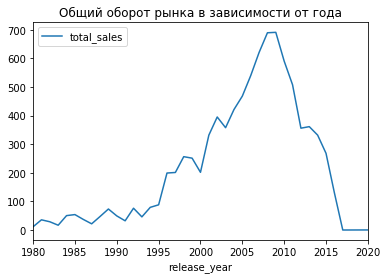

In [12]:
plot = data_games.pivot_table(index = 'release_year', values = 'total_sales', aggfunc = 'sum').reset_index().plot(title = 'Общий оборот рынка в зависимости от года', x = 'release_year', y = 'total_sales')


##  Выводы:

На основании построенного графика можно сделать выводы, что начиная с 1995 года отмечается рост общего оборота рынка игровой индустрии в 2009 году на пике оборот составлял около 700 млн. $. После 2009 года наблюдается снижение оборота, что может свидетельствовать о стагнации рынка.

## 4. Постройте ящик с усами по глобальным продажам, опишите полученный результат

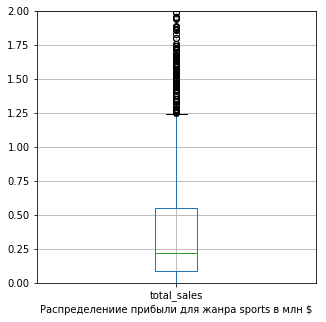

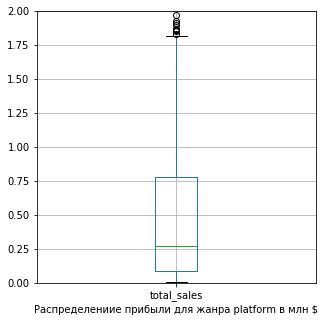

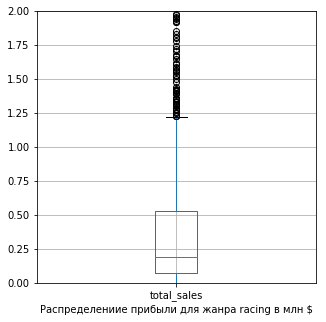

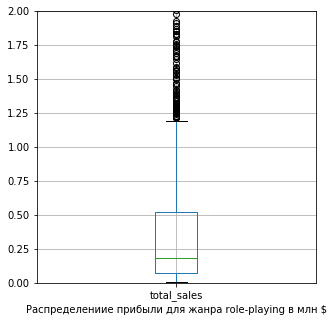

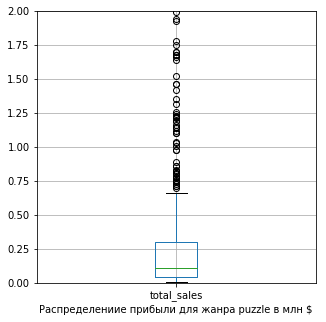

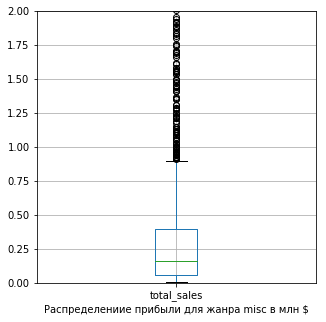

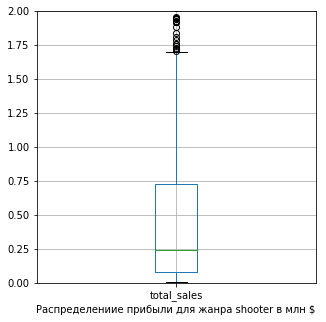

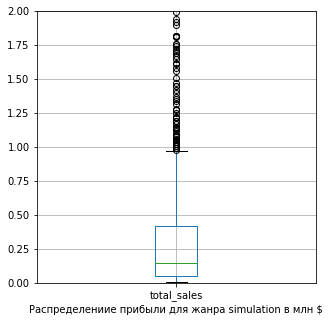

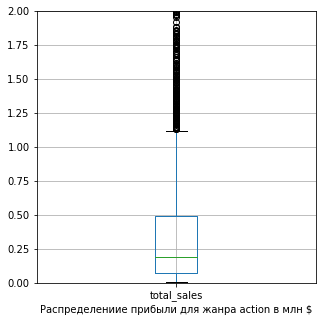

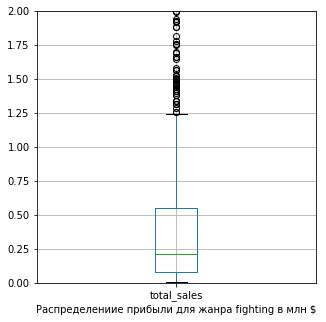

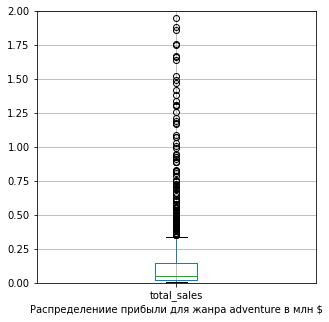

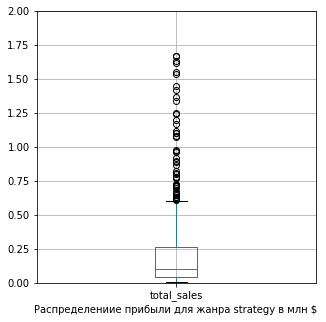

In [13]:
from matplotlib import pyplot as plt


genres = data_games['genre'].unique()

for i in genres:
    genre_game = data_games.query('genre == @i')
    plt.subplots(figsize = (5, 5))
    plot = genre_game.boxplot('total_sales')
    plot.set_ylim(0, 2)
    title = 'Распределениие прибыли для жанра ' + i + ' в млн $'
    plot.set_xlabel(title)



## Вывод:

На основании построенных графиков мы можем сделать следующие выводы для каждого жанра о полученной прибыли:
    1. Sports - прибыль составляет от 0.1 до 0.6 млн. $. Медиана - 0.24 млн. $
    2. Platform - прибыль составляет от 0.1 до 0.76 млн. $. Медиана - 0.26 млн. $
    3. Racing - прибыль составляет от 0.09 до 0.6 млн. $. Медиана - 0.2 млн. $
    4. Role-playing - прибыль составляет от 0.08 до 0.55 млн. $. Медиана - 0.2 млн. $
    5. Puzzle - прибыль составляет от 0.05 до 0.3 млн. $. Медиана - 0.1 млн. $
    6. Misc - прибыль составляет от 0.07 до 0.3 млн. $. Медиана - 0.15 млн. $
    7. Shooter - прибыль составляет от 0.1 до 0.74 млн. $. Медиана - 0.25 млн. $
    8. Simulation - прибыль составляет от 0.1 до 0.4 млн. $. Медиана - 0.15 млн. $
    9. Action - прибыль составляет от 0.1 до 0.5 млн. $. Медиана - 0.23 млн. $
    10. Fighting - прибыль составляет от 0.1 до 0.52 млн. $. Медиана - 0.22 млн. $
    11. Adventure - прибыль составляет от 0.01 до 0.12 млн. $. Медиана - 0.1 млн. $
    12. Strategy - прибыль составляет от 0.1 до 0.26 млн. $. Медиана - 0.1 млн. $.
   
   
На основании полученных данных можно сделать вывод, что наиболее финансово привлекательными жанрами являются Sports, Shooter, Platform.



## 5. Узнайте, на какой платформе было выпущено больше всего игр

In [14]:
plotforms_info = (
    data_games
    .pivot_table(index = 'platform', 
                 values = 'name', 
                 aggfunc = 'count').reset_index()
)

plotforms_info.sort_values(by = 'name', ascending = False).head(5)

,platform,name
16,ps2,2161
4,ds,2152
17,ps3,1331
25,wii,1320
28,x360,1262


# Вывод:  
    Cогласно полученным данным, больше всего игры было выпущено на  платформах PS2, Ds, PS3, Wii и XBox360.

## 6. Определите, игр какого жанра больше всего

In [15]:
genres_info = (
    data_games
    .pivot_table(index = 'genre', 
                 values = 'name', 
                 aggfunc = 'count').reset_index()
)

genres_info.sort_values(by = 'name', ascending = False).head(5)

,genre,name
0,action,3370
10,sports,2348
3,misc,1750
7,role-playing,1500
8,shooter,1323


# Вывод: 
    Согласно представленным данным для анализа больше всего выпущено игр в жанрах Action, Sports, Misc, Role-Playing и Shooter.

## 7. Найдите игры с наибольшей и наименьшей оценкой от пользователей

In [16]:
print('Игры с максимальной оценкой пользователей')

data_games.query('user_score != -1').sort_values(by = 'user_score', ascending = False).head(5)

Игры с максимальной оценкой пользователей


,id,name,platform,release_year,genre,na_sales,eu_sales,ru_sales,sales_un,critic_score,user_score,rating,total_sales,year_group
14414,14414,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,NaN,9.7,T,0.03,2005-2010
8976,8976,boktai: the sun is in your hand,gba,2003,role-playing,0.10,0.04,0.00,0.00,83.0,9.6,E,0.14,2000-2005
3417,3417,harvest moon: friends of mineral town,gba,2003,simulation,0.34,0.13,0.11,0.01,81.0,9.6,E,0.59,2000-2005
16550,16550,wade hixton's counter punch,gba,2004,sports,0.01,0.00,0.00,0.00,78.0,9.5,T,0.01,2000-2005
16631,16631,karnaaj rally,gba,2003,racing,0.01,0.00,0.00,0.00,81.0,9.5,E,0.01,2000-2005


In [17]:
print('Игры с минимальной оценкой пользователей')

data_games.query('user_score != -1').sort_values(by = 'user_score', ascending = True).head(5)

Игры с минимальной оценкой пользователей


,id,name,platform,release_year,genre,na_sales,eu_sales,ru_sales,sales_un,critic_score,user_score,rating,total_sales,year_group
2835,2835,my little pony: pinkie pie's party,ds,2008,adventure,0.66,0.00,0.0,0.06,NaN,0.0,E,0.72,2005-2010
13683,13683,myth makers: trixie in toyland,wii,2008,platform,0.04,0.00,0.0,0.00,NaN,0.2,E,0.04,2005-2010
9971,9971,madden nfl 17,ps3,2016,sports,0.07,0.02,0.0,0.02,NaN,0.2,E,0.11,None
13381,13381,billy the wizard: rocket broomstick racing,wii,2007,racing,0.04,0.00,0.0,0.00,NaN,0.3,E,0.04,2005-2010
5764,5764,happy feet,ds,2006,action,0.27,0.01,0.0,0.02,NaN,0.3,E,0.30,2005-2010


## Выводы:

Топ-5 игр с минимальной оценкой пользователей:
1. my little pony: pinkie pie's party-ds-2008-adventure	
2. myth makers: trixie in toyland - wii - 2008 - platform
3. madden nfl 17 - ps3 - 2016 - sports
4. billy the wizard: rocket broomstick racing - wii - 2007 - racing
5. happy feet - ds - 2006 - action

Топ-5 игр с максимальной оценкой пользователей
1. breath of fire iii - psp - 2005 - role-playing
2. boktai: the sun is in your hand - gba - 2003 - role-playing
3. harvest moon: friends of mineral town - gba - 2003 - simulation
4. wade hixton's counter punch - gba - 2004 - sports	
5. karnaaj rally - gba - 2003 - racing

## 8. Найдите игры с наибольшей и наименьшей оценкой от критиков

In [18]:
print('Игры с максимальной оценкой критиков')

data_games.query('critic_score != -1').sort_values(by = 'critic_score', ascending = False).head(5)

Игры с максимальной оценкой критиков


,id,name,platform,release_year,genre,na_sales,eu_sales,ru_sales,sales_un,critic_score,user_score,rating,total_sales,year_group
227,227,tony hawk's pro skater 2,ps,2000,sports,3.05,1.41,0.02,0.20,98.0,7.7,T,4.68,2000-2005
57,57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50,2005-2010
51,51,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00,2005-2010
5350,5350,soulcalibur,dc,1999,fighting,0.00,0.00,0.34,0.00,98.0,8.8,T,0.34,1995-2000
165,165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47,None


In [19]:
print('Игры с минимальной оценкой критиков')

data_games.query('critic_score != -1').sort_values(by = 'critic_score', ascending = True).head(5)

Игры с минимальной оценкой критиков


,id,name,platform,release_year,genre,na_sales,eu_sales,ru_sales,sales_un,critic_score,user_score,rating,total_sales,year_group
13690,13690,ride to hell,ps3,2013,racing,0.02,0.01,0.0,0.01,13.0,1.0,M,0.04,None
10663,10663,leisure suit larry: box office bust,ps3,2009,adventure,0.06,0.03,0.0,0.01,17.0,1.7,M,0.10,2005-2010
12823,12823,ride to hell,x360,2013,racing,0.04,0.01,0.0,0.01,19.0,1.3,M,0.06,None
10016,10016,rugby 15,ps4,2015,sports,0.04,0.06,0.0,0.02,19.0,3.4,E,0.12,None
15345,15345,balls of fury,wii,2007,sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+,0.02,2005-2010


# Выводы:

Топ-5 игр с минимальной оценкой критиков:
1. ride to hell - ps3 - 2013 - racing
2. leisure suit larry: box office bust - ps3 - 2009 - adventure
3. ride to hell - x360 - 2013 - racing
4. rugby 15 - ps4 - 2015 - sports	
5. balls of fury - wii - 2007 - sports	

Топ-5 игр с максимальной оценкой критиков
1. tony hawk's pro skater 2 - ps - 2000 - sports
2. grand theft auto iv - ps3 - 2008 - action	
3. grand theft auto iv - x360 - 2008 - action	
4. soulcalibur - dc - 1999 - fighting
5. grand theft auto v - xone - 2014 - action	


## 9. Оцените корреляцию между оценками критиков и пользовательскими оценками.

Коэффициент корреляции между оценками критиков и пользователей равен:  0.581


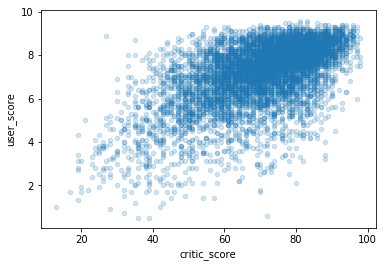

In [20]:
corr = data_games['critic_score'].corr(data_games['user_score'])

print('Коэффициент корреляции между оценками критиков и пользователей равен: ', '{:.3f}'.format(corr))

data_games.plot(kind = 'scatter', 
                x = 'critic_score',
                y = 'user_score', 
                alpha = 0.2)

# Вывод: 
    Учитывая, что коэффициент корреляции между оценками критиков и пользователей равен:  0.581, то можно говорить о том, что между этими двумя параметрами существует заметная сила корреляционной связи. 


## Шаг 4. Составьте портрет пользователя для каждого региона:

## 1. Топ-5 предпочтительных жанров:

    В качестве основного показателя мы будем использовать прибыль в каждом регионе, так как она лучше прочих отображает интерес пользователей к тому или иному жанру.

In [21]:
na_games = ( 
    data_games
    .pivot_table(index = 'genre', 
                 values = 'na_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending = False)
)

print('Топ-5 жанров в Северной Америке')
na_games.head(5)

Топ-5 жанров в Северной Америке


,genre,na_sales
0,action,879.01
10,sports,684.43
8,shooter,592.24
4,platform,445.50
3,misc,407.27


In [22]:
print('Топ-5 жанров в Европе')

(
    data_games
    .pivot_table(index = 'genre', 
                 values = 'eu_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending = False).head(5)
)


Топ-5 жанров в Европе


,genre,eu_sales
0,action,519.13
10,sports,376.79
8,shooter,317.34
6,racing,236.51
3,misc,212.74


In [23]:
print('Топ-5 жанров в России')

(
    data_games
    .pivot_table(index = 'genre', 
                 values = 'ru_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'ru_sales', ascending = False).head(5)
)



Топ-5 жанров в России


,genre,ru_sales
7,role-playing,355.46
0,action,161.44
10,sports,135.54
4,platform,130.83
3,misc,108.11


# Вывод: 
    При планировании разработки игры рекомендует я заранее рассмотреть предполагаемый рынок сбыта, так как в различных регионах предпочитаемые жанры несколько отличаются. 

Топ-5 жанров в Северной Америке:
    1. Action
    2. Sports
    3. Shooter
    4. Platform
    5. Misc
    
Топ-5 жанров в Европе:
    1. Action
    2. Sports
    3. Shooter
    4. Racing
    5. Misc

Топ-5 жанров в России:
    1. Role-Playing
    2. Action
    3. Sports
    4. Platform
    5. Misc

## 2. В какие года пользователи были наиболее активны (больше всего покупали игры)?


In [24]:
(
    data_games
    .pivot_table(index = 'release_year', 
                 values = 'na_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending = False).head(5)
)




,release_year,na_sales
28,2008,358.68
29,2009,355.13
27,2007,319.84
30,2010,300.65
26,2006,275.36


In [25]:
(
    data_games
    .pivot_table(index = 'release_year', 
                 values = 'eu_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending = False).head(5)
)


,release_year,eu_sales
29,2009,196.42
28,2008,183.92
30,2010,171.42
31,2011,162.97
27,2007,161.25


In [26]:
(
    data_games
    .pivot_table(index = 'release_year', 
                 values = 'ru_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'ru_sales', ascending = False).head(5)
)



,release_year,ru_sales
26,2006,74.35
28,2008,63.52
29,2009,63.24
27,2007,61.36
30,2010,59.49


# Вывод: 
    Hа основании проведенного анализа можно сделать выводы, что:

Топ-5 лет наибольшей активности в Северной Америке:
    1. 2008
    2. 2009
    3. 2007
    4. 2010
    5. 2006
    
Топ-5 лет наибольшей активности в Европе:
    1. 2009
    2. 2008
    3. 2010
    4. 2011
    5. 2007

Топ-5 лет наибольшей активности в России:
    1. 2006
    2. 2008
    3. 2009
    4. 2007
    5. 2010

## 3. Топ-5 предпочтительных платформ?

In [27]:
(
    data_games
    .pivot_table(index = 'platform', 
                 values = 'na_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending = False).head(5)
)


,platform,na_sales
28,x360,602.47
16,ps2,583.84
25,wii,496.90
17,ps3,393.49
4,ds,382.67


In [28]:
(
    data_games
    .pivot_table(index = 'platform', 
                 values = 'eu_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending = False).head(5)
)


,platform,eu_sales
16,ps2,339.29
17,ps3,330.29
28,x360,270.76
25,wii,262.21
15,ps,213.61


In [29]:
(
    data_games
    .pivot_table(index = 'platform', 
                 values = 'ru_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'ru_sales', ascending = False).head(5)
)


,platform,ru_sales
4,ds,175.57
15,ps,139.82
16,ps2,139.20
23,snes,116.55
2,3ds,100.67


# Вывод: 
    Hа основании проведенного анализа можно сделать выводы, что:

Топ-5 платформ в Северной Америке:
    1. x360
    2. ps2
    3. wii
    4. ps3
    5. ds
    
Топ-5 платформ в Европе:
    1. ps2
    2. ps3
    3. x360
    4. wii
    5. ps

Топ-5 платформ в России:
    1. ds
    2. ps
    3. ps2
    4. snes
    5. 3ds

## 4. Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [30]:
(
    data_games
    .pivot_table(index = 'rating', 
                 values = 'na_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'na_sales', ascending = False).head(6)
)


,rating,na_sales
1,E,1293.26
8,Unknown,1240.68
7,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56


In [31]:
(
    data_games
    .pivot_table(index = 'rating', 
                 values = 'eu_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'eu_sales', ascending = False).head(6)
)


,rating,eu_sales
1,E,710.25
8,Unknown,613.30
5,M,483.97
7,T,427.03
2,E10+,188.52
0,AO,0.61


In [32]:
(
    data_games
    .pivot_table(index = 'rating', 
                 values = 'ru_sales', 
                 aggfunc = 'sum')
    .reset_index()
    .sort_values(by = 'ru_sales', ascending = False).head(6)
)



,rating,ru_sales
8,Unknown,841.99
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46


In [33]:
rating_data

,Unnamed: 0,rating_type,decryption
0,0,E,Для всех
1,1,M,От 17 лет
2,2,T,Подросткам 13—19 лет
3,3,E10+,Для всех старше 10 лет
4,4,K-A,Для всех(до 1998 года)
5,5,AO,Только для взрослых
6,6,EC,Для детей младшего возраста
7,7,RP,Рейтинг ожидается


# Вывод: 
    Hа основании проведенного анализа можно сделать выводы, что:
Топ-5 категорий рейтинга ESRB в Северной Америке:
    1. E - Для всех
    2. T - Подросткам 13—19 лет
    3. M - От 17 лет
    4. E10+	- Для всех старше 10 лет
    5. K-A - Для всех(до 1998 года)

Топ-5 категорий рейтинга ESRB в Европе:
    1. E - Для всех
    2. M - От 17 лет
    3. T - Подросткам 13—19 лет
    4. E10+	- Для всех старше 10 лет
    5. AO - Только для взрослых

Топ-5 категорий рейтинга ESRB в России:
    1. E - Для всех
    2. T - Подросткам 13—19 лет
    3. M - От 17 лет
    4. E10+	- Для всех старше 10 лет
    5. K-A - Для всех(до 1998 года)

Таким образом, лидером во всех странах являются игры без ограничений по возрасту. Рекомендуется создавать именно такую игру.

N.B.! В результатах анализа на достаточно высоких позициях находятся игры, для которых не указан никакой рейтинг. Вполне возможно, что на момент сбора данных рейтинг еще не был получен. В таком случае данные игры можно отнести к категории RP - рейтинг ожидается.

# Шаг 4. Проверка гипотез:

## 1. Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый. 

Формируем нулевую гипотезу: Средний пользовательский рейтинг платформ одинаковый. 

In [34]:
from scipy import stats as st
import numpy as np

ps2_data = data_games.dropna().query('platform == "ps2" and user_score != -1')

ps3_data = data_games.dropna().query('platform == "ps3" and user_score != -1')

print('Дисперсия для ps2_data["user_score"] = ', np.var(ps2_data['user_score']))
print('Дисперсия для ps3_data["user_score"] = ', np.var(ps3_data['user_score']))

Дисперсия для ps2_data["user_score"] =  1.6702084126040417
Дисперсия для ps3_data["user_score"] =  1.682069637204772


In [35]:
alpha = 0.05

results = st.ttest_ind(ps2_data['user_score'], ps3_data['user_score'], equal_var = True)

#Учитывая, что дисперсия для данных (проверено выше) не отличается, параметр equal_var устанавливается True

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
    
print('Средний пользовательский рейтинг для платформы PS2: ', ps2_data['user_score'].mean())
print('Средний пользовательский рейтинг для платформы PS3: ', ps3_data['user_score'].mean())

Отвергаем нулевую гипотезу

Средний пользовательский рейтинг для платформы PS2:  7.6660344827586275
Средний пользовательский рейтинг для платформы PS3:  6.886486486486486


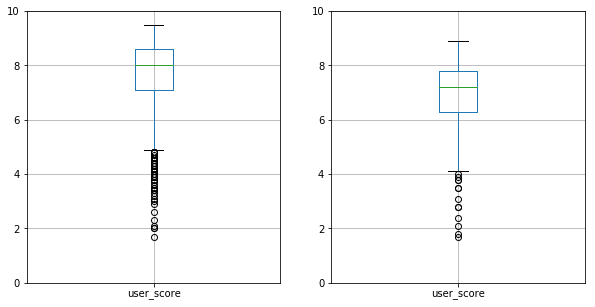

In [36]:
plt.subplots(figsize = (10, 5))
plot = ps2_data.boxplot('user_score', ax = plt.subplot(1, 2, 1))
lim = plot.set_ylim(0, 10)
plot = ps3_data.boxplot('user_score', ax = plt.subplot(1, 2, 2))
lim = plot.set_ylim(0, 10)

# Вывод: 
    Отвергнув нулевую гипотезу, мы можем сделать вывод, что средний пользовательский рейтинг для плотформ PS2 и PS3 отличается. Средний пользовательзовательский рейтинг для платформы PS2 выше и составляет 7.62 против 6.72 для PS3.

    На данном этапе мы использовали st.ttest_ind, так как мы исследуем гипотезу о равенстве средних двух генеральных совокупностей.

## 2. Средний пользовательский рейтинг жанров Action и Sports различается.

Формулируем нулевую гипотезу: средний пользовательский рейтинг жанров Action и Sports равен

In [37]:
action_data = data_games.dropna().query('genre == "action" and user_score != -1')
sport_data = data_games.dropna().query('genre == "sports" and user_score != -1')

print('Дисперсия для action_data["user_score"] = ', np.var(action_data['user_score']))
print('Дисперсия для sport_data["user_score"] = ', np.var(sport_data['user_score']))

Дисперсия для action_data["user_score"] =  2.0062317779610495
Дисперсия для sport_data["user_score"] =  1.7617454492374955


In [38]:
alpha = 0.05

results = st.ttest_ind(action_data['user_score'], sport_data['user_score'], equal_var = False)

#Учитывая, что дисперсия для данных (проверено выше) отличается, параметр equal_var устанавливается False

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()
    
print('Средний пользовательский рейтинг для жанра Action: ', action_data['user_score'].mean())
print('Средний пользовательский рейтинг для жанра Sports: ', sport_data['user_score'].mean())

Отвергаем нулевую гипотезу

Средний пользовательский рейтинг для жанра Action:  7.272355289421175
Средний пользовательский рейтинг для жанра Sports:  7.413543091655274


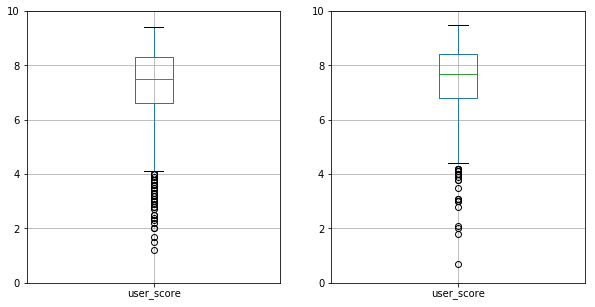

In [39]:
plt.subplots(figsize = (10, 5))
plot = action_data.boxplot('user_score', ax = plt.subplot(1, 2, 1))
lim = plot.set_ylim(0, 10)
plot = sport_data.boxplot('user_score', ax = plt.subplot(1, 2, 2))
lim = plot.set_ylim(0, 10)

# Вывод: 
    Подтвердив нулевую гипотезу, мы можем сделать  вывод, что средний рейтинг для игр в жанре Sports  и Action равны и составляют порядка  7. 

    На данном этапе мы использовали st.ttest_ind, так как мы исследуем гипотезу о равенстве средних двух генеральных совокупностей.

# Общие выводы!

При планировании разработки нового игрового проекта рекомендуется обращать внимание на:
    1. Жанр игры. Наиболее привлекательными вариантами являются Sports, Action, Shooter и Role-Playing.
    2. Рынок сбыта. В Северной Америке прибыль максимальна, но пользователи более критично относятся к качеству игры.
    3. Полученный рейтинг от ESRB. Подавляющее большинство игр имеют рейтинг Е - для всех.
    4. Платформу, для которой создается игра. В разных регионах популярностью пользуются разные платформы, однако наиболее предпочитаемыми являются PS2/3, X360, Wii, Ds.
    5. Рекомендуется заранее спланировать PR-компанию и заручиться поддержкой критиков, так как при наличии отзывов от профильных специалистов существенно повышаются общие продажи.